# Black-Friday-Sales-Prediction

<h3>Project description</h3>

A retail company wants to understand the customer purchase behavior (specifically, purchase amount) against various products of different categories.
They have shared a purchase summary of various customers for selected high volume products from last month. 

The data set also contains customer demographics (age, gender, marital status, city type, stay in_current_city), product details (product_id and product category) and Total purchase_amount from last month. 

<i>Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products <i>.
  
Your goal in this project is to create a robust regression model, that will use this data to predict the customers' total purchase amount for different products.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 

# 0.Understand the task, Load Data


In [ ]:
data = pd.read_csv('BF_train.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429156 entries, 0 to 429155
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     429156 non-null  int64  
 1   Product_ID                  429156 non-null  object 
 2   Gender                      429155 non-null  object 
 3   Age                         429155 non-null  object 
 4   Occupation                  429155 non-null  float64
 5   City_Category               429155 non-null  object 
 6   Stay_In_Current_City_Years  429155 non-null  object 
 7   Marital_Status              429155 non-null  float64
 8   Product_Category_1          429155 non-null  float64
 9   Product_Category_2          295891 non-null  float64
 10  Product_Category_3          131351 non-null  float64
 11  Purchase                    429155 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 39.3+ MB


In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [ ]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.291560e+05,429155.000000,429155.000000,429155.000000,295891.000000,131351.000000,429155.000000
mean,1.003026e+06,8.077629,0.409936,5.297450,9.844520,12.658556,9329.595629
std,1.728256e+03,6.524068,0.491822,3.749678,5.088111,4.126073,4978.893423
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001510e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003072e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8061.000000
75%,1.004476e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12070.500000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [ ]:
unique_users = len(data.User_ID.unique())
print('Number of customers:',unique_users)
unique_products = len(data.Product_ID.unique())
print('Number of products:',unique_products)

Number of customers: 5891
Number of products: 3588


In [ ]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             1
Age                                1
Occupation                         1
City_Category                      1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2            133265
Product_Category_3            297805
Purchase                           1
dtype: int64

In [ ]:
total_rows = len(data)
PC2_missing_values = data['Product_Category_2'].isnull().sum()/total_rows
PC3_missing_values = data['Product_Category_3'].isnull().sum()/total_rows

print(PC2_missing_values,PC3_missing_values)

0.31052810632963307 0.6939318103440241


In [ ]:
columns=['Gender','Age','Occupation',	'City_Category',	'Stay_In_Current_City_Years',	'Marital_Status',	'Product_Category_1',	'Product_Category_2',	'Product_Category_3']

for col in columns:
    print(f'\n{pd.value_counts(data[col])}')


M    323282
F    105873
Name: Gender, dtype: int64

26-35    171288
36-45     85850
18-25     77939
46-50     35591
51-55     30045
55+       16701
0-17      11741
Name: Age, dtype: int64

4.0     56516
0.0     54265
7.0     46032
1.0     37079
17.0    31172
20.0    26300
12.0    24228
14.0    21410
2.0     20709
16.0    19818
6.0     15914
3.0     13789
10.0    10046
15.0     9489
5.0      9458
11.0     9078
19.0     6595
13.0     6043
18.0     5100
9.0      4912
8.0      1202
Name: Occupation, dtype: int64

B    180979
C    132780
A    115396
Name: City_Category, dtype: int64

1     151049
2      79319
3      74468
4+     66163
0      58156
Name: Stay_In_Current_City_Years, dtype: int64

0.0    253229
1.0    175926
Name: Marital_Status, dtype: int64

5.0     118645
1.0     110258
8.0      89634
11.0     19096
2.0      18791
6.0      16024
3.0      15856
4.0       9313
16.0      7763
15.0      4946
13.0      4358
10.0      4033
12.0      3106
7.0       2932
18.0      2427
14.0      1

- NOTE

 The data set consist of:
  - 550.068 records (rows)
  -   5.891 unique customers
  -   3.631 unique products. 
  -   7 numeric and 5 categorical features  
  - Missing values were identified in two columns, **Product_category_2** (173.638 or 31%) and **Product_category_3** (383.247 or 69%). The missing values will be filled in the Data Preprocessing part. 



# 1.Exploratory Data Analysis

 ## Univariate Analisys

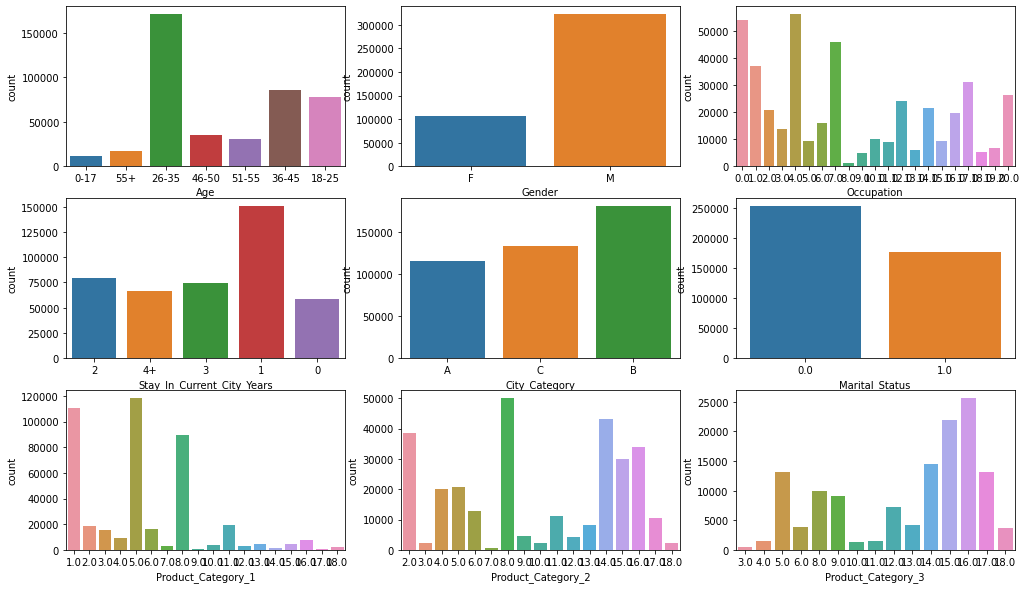

In [ ]:
# Creating Count plots for categorical fields 
fig,axis = plt.subplots(nrows=3,ncols=3,figsize=(17,10))

sns.countplot(data["Age"],ax=axis[0,0])
sns.countplot(data["Gender"],ax=axis[0,1])
sns.countplot(data["Occupation"],ax=axis[0,2])
sns.countplot(data["Stay_In_Current_City_Years"],ax=axis[1,0])
sns.countplot(data["City_Category"],ax=axis[1,1])
sns.countplot(data["Marital_Status"],ax=axis[1,2])
sns.countplot(data["Product_Category_1"],ax=axis[2,0])
sns.countplot(data["Product_Category_2"],ax=axis[2,1])
sns.countplot(data["Product_Category_3"],ax=axis[2,2])

NOTE:
1. In figure 1, The most transactions are performed by the customers in the range of 26–35 age 
2. In figure 2, Male customers executed more transactions than females.
3. In figure 3, Customers with occupations 0 and 4 performed the most transactions.
4. In figure 4, Custumers who stayed in the current city for 1 year, performed the highest number of transactions.
5. In figure 5, Customers from city category B, did the highest number of transactions.
6. In figure 6, Customers who are single, performed more transactions than married customers.

However, at this point, final conclusions in this respect cannot be made, but further analysis will be performed.

 ## Bivariate Analisys

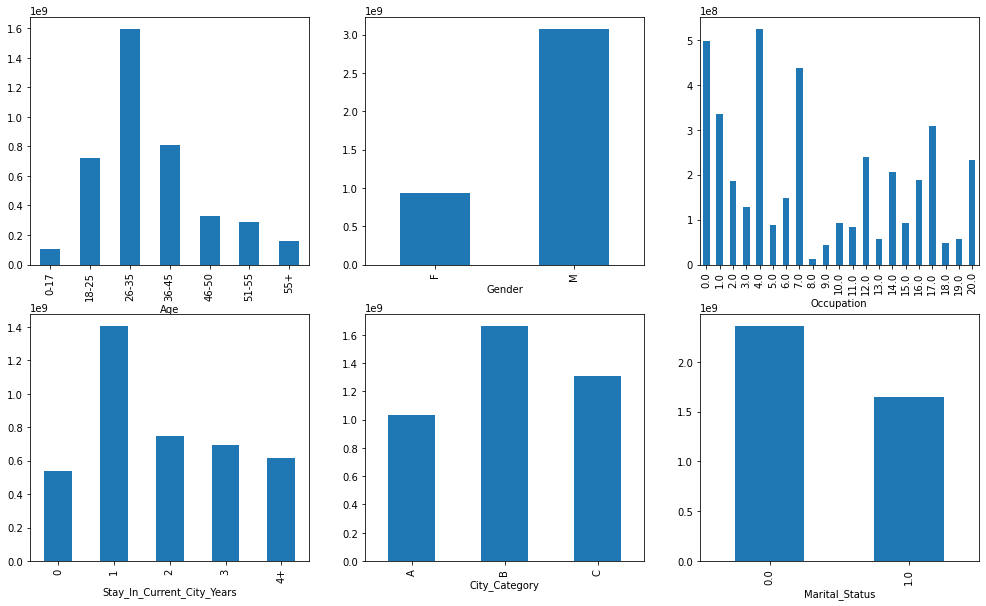

In [ ]:
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(17,10))

data.groupby(["Age"])["Purchase"].sum().plot(kind='bar',ax=axis[0,0])
data.groupby(["Gender"])["Purchase"].sum().plot(kind='bar',ax=axis[0,1])
data.groupby(["Occupation"])["Purchase"].sum().plot(kind='bar',ax=axis[0,2])
data.groupby(["Stay_In_Current_City_Years"])["Purchase"].sum().plot(kind='bar',ax=axis[1,0])
data.groupby(["City_Category"])["Purchase"].sum().plot(kind='bar',ax=axis[1,1])
data.groupby(["Marital_Status"])["Purchase"].sum().plot(kind='bar',ax=axis[1,2])

 - Note 
1. In figure 1, The most money was spent by customers aged 26 to 35 years.
2. In figure 2, Male customers spent more money than females.
3. In figure 3, Customers with occupations 0 and 4 spent the most.
4. In figure 4, costumer who stayed in the current city for 1 year spent the most.
5. In figure 5, Customers from city category B spent the most.
6. In figure 6, Customers who are single, spent more money than married customers.

If the insights from both analysis (univariate and bivariate) are compared, can be concluded that the same results were received. The reason behind this is the disbalance of the categories in each of the analyzed features. 

Consequently, the bivariate analysis will be supplemented with analysis of the relationship between the average of each categorical feature and the target variable.

## Bivariate mean analysis 

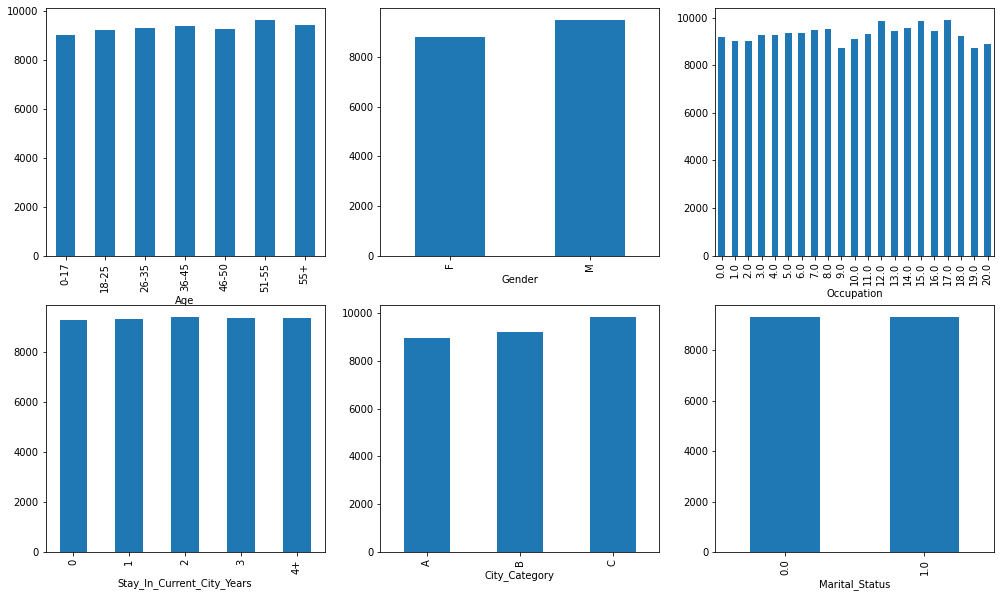

In [ ]:
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(17,10))

data.groupby(["Age"])["Purchase"].mean().plot(kind='bar',ax=axis[0,0])
data.groupby(["Gender"])["Purchase"].mean().plot(kind='bar',ax=axis[0,1])
data.groupby(["Occupation"])["Purchase"].mean().plot(kind='bar',ax=axis[0,2])
data.groupby(["Stay_In_Current_City_Years"])["Purchase"].mean().plot(kind='bar',ax=axis[1,0])
data.groupby(["City_Category"])["Purchase"].mean().plot(kind='bar',ax=axis[1,1])
data.groupby(["Marital_Status"])["Purchase"].mean().plot(kind='bar',ax=axis[1,2])

-  Note
 - As it was assumed, this analysis shows that there is no significant correlation between each category within a feature and the Purchase. With other words, the presented correlation in the previous visualization was driven by the misbalanced set of data. 

## Multivariate analysis


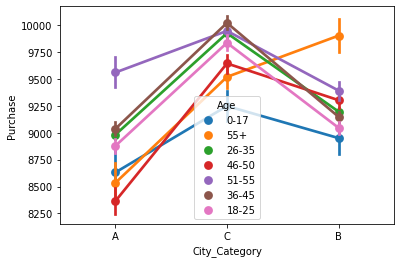

In [ ]:
ax = sns.pointplot(x="City_Category", y="Purchase", hue="Age",
                   data=data)

- Note 
  - The stark difference in the purchase acoss City_Categories for the Age Group of 55 and above. It is highest in City_Category_B, as compared to the other age groups which tend to show high purchase in City_Category_C.

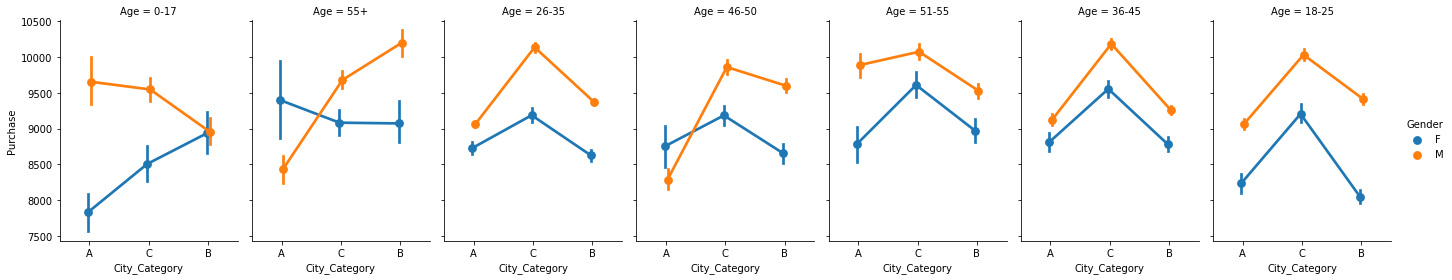

In [ ]:
g = sns.catplot(x="City_Category", y="Purchase",
                hue="Gender", col="Age",
                data=data, kind="point",
                dodge=True,
                height=4, aspect=.7)

- Note 
  -	From this analysis it is evident lower purchase amount for age group 0-17 females in the City_Category A, age group 46-50 male in City_Category A and age group +55 males in City Category A, so the company can make some special promotions for this categories in order to increase the sales if this is in line with their sales strategy.

##Target variable distribution and outliers

RuntimeError: ignored

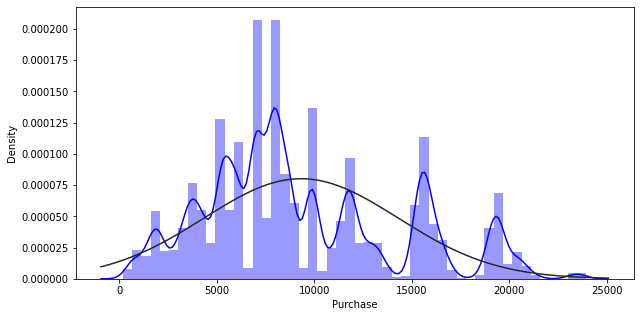

In [ ]:
from scipy import stats
from scipy.stats import norm

# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (10, 5)
sns.distplot(data['Purchase'], color = 'blue', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(data['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

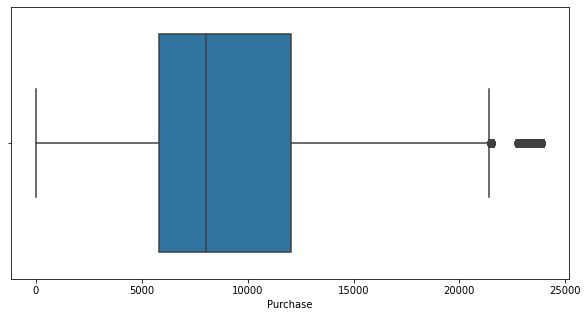

In [ ]:
sns.boxplot(data['Purchase'])

In [ ]:
z=np.abs(stats.zscore(data['Purchase']))
print(len(np.where(z>=3)[0]))

0


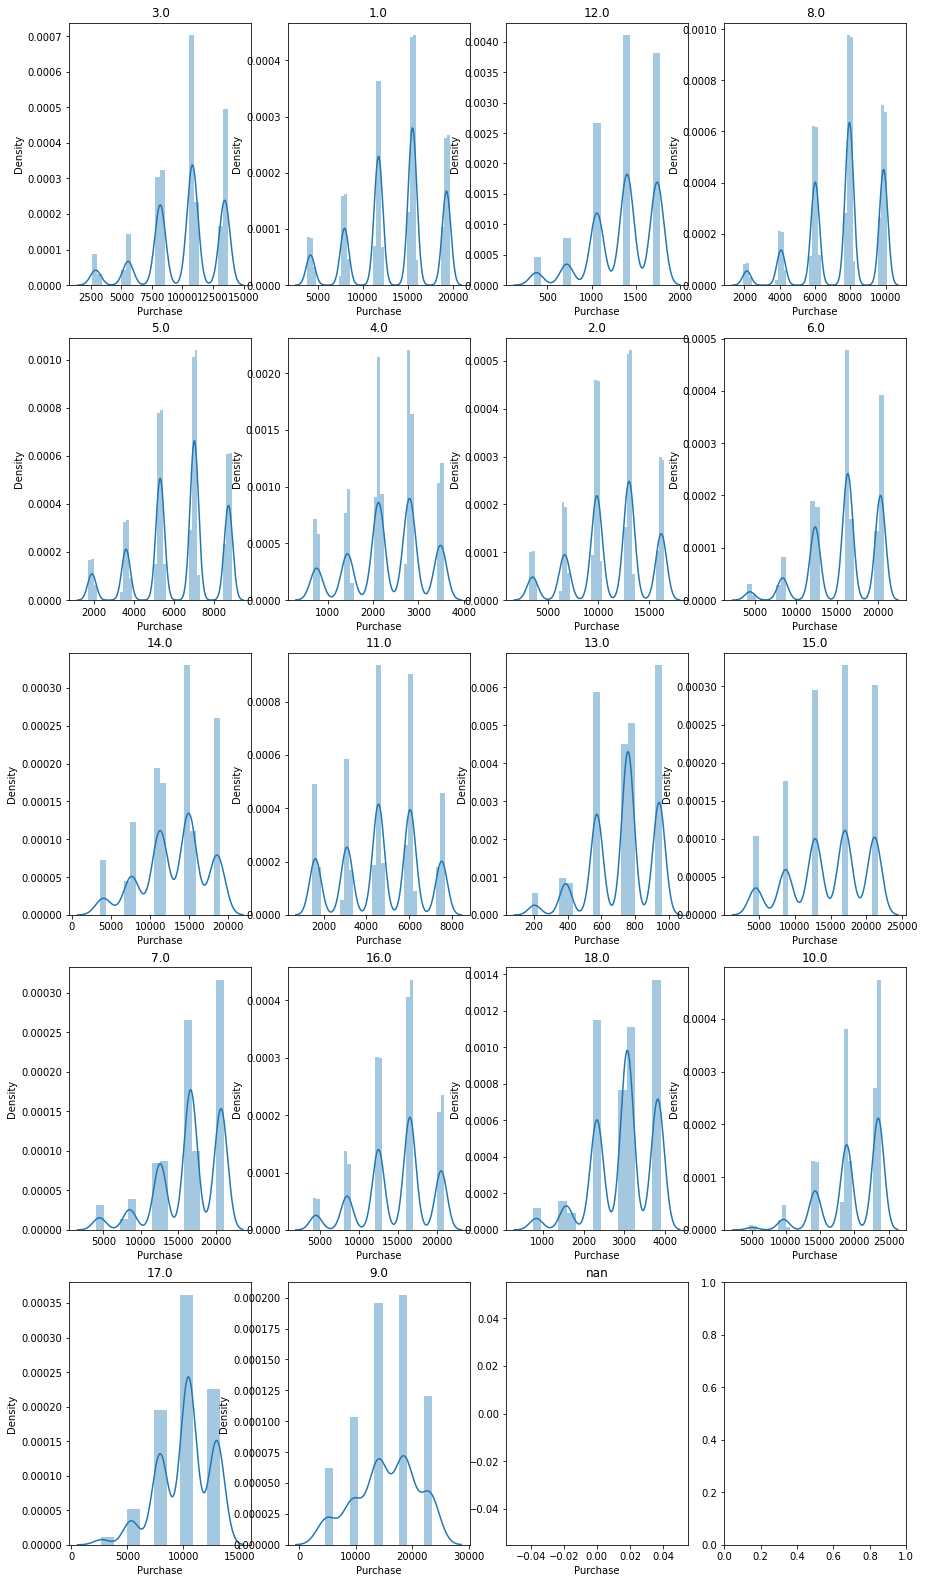

In [ ]:
brows = 5
bcols = 4
fig,axis = plt.subplots(nrows=brows,ncols=bcols,figsize=(15,28))
uv = data['Product_Category_1'].unique()
for key, value in enumerate(data['Product_Category_1'].unique()):
  datavv= data[(data['Product_Category_1'] == value)]
  sns.distplot(datavv.loc[:,'Purchase'], ax=axis[key//4,key%bcols]).set(title=value)

- Note
  -	From the distribution plot, which represent the distribution of the target varibale (Pruchase), can be concluded that the target variable follows the Gaussian (Norma) distribution.

 - 	From the boxplot, can be seen that there are few values lying outside (outliers). But if the z-score is considered, can be concluded that there are no values above the usual threshold level (generally taken as 3).

 - From the distribution plot that represents the distribution of each Product_Category_1, can be concluded that the target variable follows Gaussian(normal) distribution within each Product_Category_1

# 2.Data preprocessing

### Fill missing values
As it was previously presented, there are 2 variables with missing values. In this regards, different strategies were tested:

o	Fill in with mean value.

o	Fill in with 0.

o	Custom fill in.



In [ ]:
def fill_null():
  data['Product_Category_2']=data['Product_Category_2'].fillna(0).astype('int64')
  data['Product_Category_3']=data['Product_Category_3'].fillna(0).astype('int64')

In [ ]:
def fill_custom(with_print):
  cat1_list = data['Product_Category_1'].unique()
  cat2_list = data['Product_Category_2'].unique()
  cat3_list = data['Product_Category_3'].unique()  
  for c1 in cat1_list:
    for c2 in cat2_list[1:]:
      dd = data[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']][(data['Product_Category_1'] == c1) & (data['Product_Category_2'] == c2) & (data['Product_Category_3'].notna())].value_counts()
      dd_null = data[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']][(data['Product_Category_1'] == c1) & (data['Product_Category_2'] == c2) & (data['Product_Category_3'].isna())]
      if len(dd) > 0 and len(dd_null) > 0:
        if with_print and c1 == 3.0 and c2 == 4.0:
          print(dd)
          print(dd_null)

        most_frequent = dd.index[0][2]
        data.loc[(data['Product_Category_1'] == c1) & (data['Product_Category_2'] == c2) & (data['Product_Category_3'].isna()), "Product_Category_3"] = most_frequent
  
  data['Product_Category_2']=data['Product_Category_2'].fillna(0).astype('int64')
  data['Product_Category_3']=data['Product_Category_3'].fillna(0).astype('int64')    

fill_custom(True)

Product_Category_1  Product_Category_2  Product_Category_3
3.0                 4.0                 5.0                   5221
                                        12.0                  3714
                                        9.0                    430
                                        8.0                    148
dtype: int64
        Product_Category_1  Product_Category_2  Product_Category_3
33                     3.0                 4.0                 NaN
100                    3.0                 4.0                 NaN
423                    3.0                 4.0                 NaN
424                    3.0                 4.0                 NaN
426                    3.0                 4.0                 NaN
...                    ...                 ...                 ...
428435                 3.0                 4.0                 NaN
428442                 3.0                 4.0                 NaN
428507                 3.0                 4.0           

- NOTE:
Best results were received with the custom function for filling in the missing values, which includes: 

 - **For Product_category_3:** for all the combinations of values of Product_category_1 and Product_category_2, the most frequent Product_category_3 was found and it was used for filling in the missing values in Product_category_3, for the appropriate combination of the first two categories. For all the missing values in Product_category_3, for which also the Product_category_2 is empty, zero was used for filling in.

  _For example,_ when Product_Category_1 is 3 and Product_Category_2 is 4, the Product_Category_3 occurs as 5, 12, 9 and 8, but the most frequent is 5. This means that every time when Product_Category_1 is 3, Product_Category_2 is 4, and the value of Product_Category_3 is missing, it will be filled in with 5. 

 - **For Product_category_2:** missing values were filled in with 0.

# 3.Feature Engineering

From the previous analysis, it was concluded that there is a very weak correlation between each feature and the target variable, except for the Product_Category_1 feature.

As a result, it was decided, new features to be created, in order to increase the correlation, thus to increase the probability score of the prediction model     which will be developed. 

### Creation of a new feature - column "Category_Count"
 **Category_Count**-  it counts the number of categories (Product_Category_1, Product_Category_2 and Product_Category_3) to which each product belongs.


In [ ]:
def fill_count(cols):
  Product_Category_1 = cols[0]
  Product_Category_2 = cols[1]
  Product_Category_3 = cols[2]    
  cnt = 0    
  if Product_Category_1 != 0:
      cnt += 1
  if Product_Category_2 != 0:
    cnt += 1
  if Product_Category_3 != 0:
    cnt += 1
  return cnt  

### Creation of a new feature - column "Product_popularity_score"
**Product_popularity_score**- it counts the number of transaction per product, and then scales the values with MinMaxScaler. 

In [ ]:
def column_popularity_score():
  unique_products = pd.DataFrame(data.Product_ID.unique(), columns = ["Product_ID"])
  p_score = data.groupby(['Product_ID']).Product_ID.agg('count').to_frame('Count_of_product').reset_index()  
  scaler = MinMaxScaler(feature_range=(0,1))
  p_score['Product_popularity_score'] = scaler.fit_transform(p_score[['Count_of_product']])
  product_dict = dict(zip(p_score.Product_ID, p_score.Product_popularity_score))
  data['Popularity_score'] = data['Product_ID'].map(product_dict)  

### Function for reloading the data set

In [ ]:
def renew_data():
  data = pd.read_csv('BF_train.csv') 
  data = data.dropna(subset=['Product_Category_1'])
  data['Product_Category_1'] = data['Product_Category_1'].astype('int64')  

  return data

### Label encoding for categroical features
- NOTE: In regards to ****label encoding of the categorical features****, different strategies were used, but no improvements of the model were reached. Thus, it was decided the label encoding to be used, because that way, the model training was the fastest.

In [ ]:
def label_encoding():
  le = LabelEncoder()
  data["Age"] = le.fit_transform(data["Age"])
  data["Occupation"] = le.fit_transform(data["Occupation"])
  data["City_Category"] = le.fit_transform(data["City_Category"])
  data["Stay_In_Current_City_Years"] = le.fit_transform(data["Stay_In_Current_City_Years"])
  data["Marital_Status"] = le.fit_transform(data["Marital_Status"])
  data["Gender"] = le.fit_transform(data["Gender"])

### Join all previous functions in one cell, which was very helpful in the ping-pong proccess.

In [ ]:
data = renew_data()  
fill_custom(False)
data['Category_Count'] = 0
data['Category_Count']=data[['Product_Category_1','Product_Category_2','Product_Category_3']].apply(fill_count, axis =1) 
column_popularity_score()
data = data.drop(['User_ID', 'Product_ID'], axis=1)
label_encoding()
y = pd.DataFrame(data.iloc[:,-3])
X = data.drop(['Purchase'], axis=1)
y_expl = y.copy()
X_expl = X.copy()

In [ ]:
data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Popularity_score
0,0,0,10,0,2,0,3,0,0,8370,1,0.120277
1,0,0,10,0,2,0,1,6,14,15200,3,0.308675
2,0,0,10,0,2,0,12,0,0,1422,1,0.053752
3,0,0,10,0,2,0,12,14,17,1057,3,0.180947
4,1,6,16,2,4,0,8,0,0,7969,1,0.107504
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,0,0,368,1,0.444918
550064,0,2,1,2,3,0,20,0,0,371,1,0.432677
550065,0,2,15,1,4,1,20,0,0,137,1,0.432677
550066,0,6,1,2,2,0,20,0,0,365,1,0.432677


### Correlation matrics
- NOTE: After the performed feature engineering, the correlation between each feature and the target variable is presented on a **Correlation matrix**, with using the seaborn heatmap.

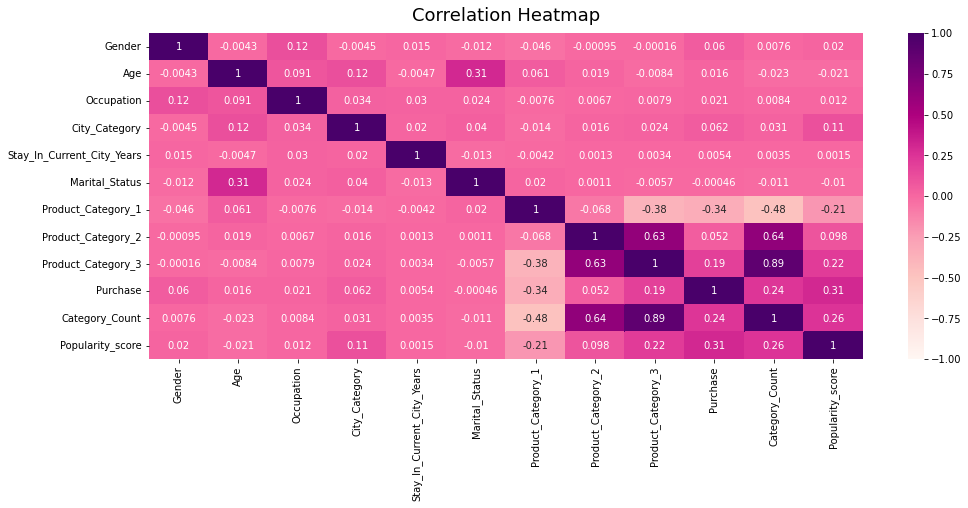

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='RdPu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

NOTE:
From the visualization, it can easily be concluded, what in fact through the previous analysis was proved, that there is a very low correlation between all the features and the target variable, except for Product_category_1, Product_category_2, Product_category_3 and the new features, Category_count and Product_popularity_score. 

The 2 newly developed features appear with high correlation with the target variable, which justifies their existence in the model.

In [ ]:
sc_data = StandardScaler()
X = sc_data.fit_transform(X)
X

array([[-1.74651251, -1.84424754,  0.29486356, ..., -1.17257504,
        -1.42133537, -0.61503538],
       [-1.74651251, -1.84424754,  0.29486356, ...,  0.72243849,
         0.75638829,  0.35921387],
       [-1.74651251, -1.84424754,  0.29486356, ..., -1.17257504,
        -1.42133537, -0.95904995],
       ...,
       [-1.74651251, -0.36673935,  1.06142262, ..., -1.17257504,
        -1.42133537,  1.00045702],
       [-1.74651251,  2.58827703, -1.08494277, ..., -1.17257504,
        -1.42133537,  1.00045702],
       [-1.74651251,  1.11076884, -1.23825458, ..., -1.17257504,
        -1.42133537,  1.23438692]])

# 4.Data Modeling

The obtained data set was divided into train and test data set, in a ratio of 70/30.

### Model improvement and history

In [ ]:
model_history = {'Metric': ['RMSE_test','R2_test']}

In [ ]:
data = renew_data()
fill_null()
data = data.drop(['User_ID', 'Product_ID'], axis=1)
label_encoding()
y = pd.DataFrame(data.iloc[:,-1])
X = data.drop(['Purchase'], axis=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.30)
xgb_1 = XGBRegressor()
xgb_1.fit(X_train1, y_train1)

y_pred_test1 = xgb_1.predict(X_test1)

rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_pred_test1))
r2_test1 = r2_score(y_test1, y_pred_test1)


result1 = [rmse_test1, r2_test1]
result1

[17:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[2985.4552347918866, 0.645306648968527]

In [ ]:
data = renew_data()
fill_custom(False)
data = data.drop(['User_ID', 'Product_ID'], axis=1)
label_encoding()
y = pd.DataFrame(data.iloc[:,-1])
X = data.drop(['Purchase'], axis=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.20)
xgb_1 = XGBRegressor()
xgb_1.fit(X_train1, y_train1)

y_pred_test1 = xgb_1.predict(X_test1)

rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_pred_test1))
r2_test1 = r2_score(y_test1, y_pred_test1)


result2 = [rmse_test1, r2_test1]
result2


[17:13:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[2984.989973003986, 0.645835558978604]

In [ ]:
data = renew_data()
fill_custom(False)
data['Category_Count'] = 0
data['Category_Count']=data[['Product_Category_1','Product_Category_2','Product_Category_3']].apply(fill_count, axis =1)
data = data.drop(['User_ID', 'Product_ID'], axis=1)
label_encoding()
y = pd.DataFrame(data.iloc[:,-2])
X = data.drop(['Purchase'], axis=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.20)
xgb_1 = XGBRegressor()
xgb_1.fit(X_train1, y_train1)

y_pred_test1 = xgb_1.predict(X_test1)

rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_pred_test1))
r2_test1 = r2_score(y_test1, y_pred_test1)


result3 = [rmse_test1, r2_test1]
result3

[17:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[2981.064372960346, 0.6494780952759565]

In [ ]:
data = renew_data()
fill_custom(False)
data['Category_Count'] = 0
data['Category_Count']=data[['Product_Category_1','Product_Category_2','Product_Category_3']].apply(fill_count, axis =1)
column_popularity_score()
data = data.drop(['User_ID', 'Product_ID'], axis=1)
label_encoding()
y = pd.DataFrame(data.iloc[:,-3])
X = data.drop(['Purchase'], axis=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.20)
xgb_1 = XGBRegressor()
xgb_1.fit(X_train1, y_train1)

y_pred_test1 = xgb_1.predict(X_test1)

rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_pred_test1))
r2_test1 = r2_score(y_test1, y_pred_test1)


result4 = [rmse_test1, r2_test1]
result4

[17:15:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[2841.45583033856, 0.6802034439244442]

In [ ]:
data = renew_data()
fill_custom(False)
data['Category_Count'] = 0
data['Category_Count']=data[['Product_Category_1','Product_Category_2','Product_Category_3']].apply(fill_count, axis =1)
column_popularity_score()
data = data.drop(['User_ID', 'Product_ID'], axis=1)
label_encoding()
y = pd.DataFrame(data.iloc[:,-3])
X = data.drop(['Purchase'], axis=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.30)
xgb_1 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.01, subsample=0.7, colsample_bytree=0.8)
xgb_1.fit(X_train1, y_train1)

y_pred_test1 = xgb_1.predict(X_test1)

rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_pred_test1))
r2_test1 = r2_score(y_test1, y_pred_test1)


result5 = [rmse_test1, r2_test1]
result5


[17:16:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[2599.7333643760408, 0.7323469416249255]

In [ ]:
model_history['Fill_with_0'] = result1
model_history['Fill_custom'] = result2
model_history['Feature_Column_Count'] = result3
model_history['Feature_Popularity_Score'] = result4
model_history['Tuned_model'] = result5
comp = pd.DataFrame (model_history, columns = ['Metric', 'Fill_with_0', 'Fill_custom', 'Feature_Column_Count', 'Feature_Popularity_Score', 'Tuned_model'])
comp

,Metric,Fill_with_0,Fill_custom,Feature_Column_Count,Feature_Popularity_Score,Tuned_model
0,RMSE_test,2985.455235,2984.989973,2981.064373,2841.455830,2599.733364
1,R2_test,0.645307,0.645836,0.649478,0.680203,0.732347


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

In [ ]:
def models_fit_evaluate(model):
  model.fit(X_train, y_train)
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  mae_test = mean_absolute_error(y_test, y_pred_test)
  mse_test = mean_squared_error(y_test, y_pred_test)
  rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
  r2_test = r2_score(y_test, y_pred_test)

  mae_train = mean_absolute_error(y_train, y_pred_train)
  mse_train = mean_squared_error(y_train, y_pred_train)
  rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
  r2_train = r2_score(y_train, y_pred_train)

  result = [mae_test, mse_test, rmse_test, r2_test, mae_train, mse_train, rmse_train, r2_train]
  return result

In [ ]:
data_model = {'Metric':  ['MAE_test', 'MSE_test','RMSE_test','R2_test','MAE_train', 'MSE_train','RMSE_train','R2_train']}

In [ ]:
 # Create Dummy regressor with 'mean'
dummy_regr = DummyRegressor(strategy = 'mean')
data_model['Dummy'] = models_fit_evaluate(dummy_regr)

In [ ]:
# Linear regressor
lin = linear_model.LinearRegression()
data_model['Lin'] = models_fit_evaluate(lin)

In [ ]:
# LASSO regressor
lasso = linear_model.Lasso(alpha=0.1)
data_model['Lasso'] = models_fit_evaluate(lasso)

In [ ]:
 # KNN regressor
knnr = KNeighborsRegressor(n_neighbors = 10)
data_model['KNN'] = models_fit_evaluate(knnr) 

In [ ]:
# RandomForest Regressor
# rf = RandomForestRegressor(max_leaf_nodes=800, random_state = 1)
rf = RandomForestRegressor()
data_model['RF'] = models_fit_evaluate(rf)

In [ ]:
# Create XGBoost regressor
xgb = XGBRegressor()
data_model['XGB'] = models_fit_evaluate(xgb)

[07:00:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
comparison = pd.DataFrame (data_model, columns = ['Metric', 'Dumm', 'Lin', 'Lasso', 'KNN',  'RF', 'XGB'])
comparison

,Metric,Dumm,Lin,Lasso,KNN,RF,XGB
0,MAE_test,NaN,3.489915e+03,3.489940e+03,2.543048e+03,2.102277e+03,2.123007e+03
1,MSE_test,NaN,2.058447e+07,2.058445e+07,1.222589e+07,8.161580e+06,8.001999e+06
2,RMSE_test,NaN,4.537011e+03,4.537009e+03,3.496554e+03,2.856848e+03,2.828780e+03
3,R2_test,NaN,1.861872e-01,1.861876e-01,5.166458e-01,6.773296e-01,6.836386e-01
4,MAE_train,NaN,3.485061e+03,3.485087e+03,2.286766e+03,9.024937e+02,2.128055e+03
5,MSE_train,NaN,2.055876e+07,2.055876e+07,9.892446e+06,1.692555e+06,8.055830e+06
6,RMSE_train,NaN,4.534177e+03,4.534177e+03,3.145226e+03,1.300983e+03,2.838279e+03
7,R2_train,NaN,1.843128e-01,1.843128e-01,6.075084e-01,9.328464e-01,6.803778e-01


- NOTE: 
- For the data modeling, different algorithms with default parameters were used: Dummy regressor, Linear regressor, Lasso regressor, KNN regressor, Random forest regressor and XGB. 

- Best results were reached with the XGB regressor, so this algorithm was selected for further development with HyperParameter Tuning.



In [ ]:
xgb_1 = XGBRegressor()
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [0.01, 0.03, 0.07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4,5],
              'subsample': [0.7,0.8],
              'colsample_bytree': [0.7,0.8],
              'n_estimators': [500,700,1000,1100]}

xgb_grid = RandomizedSearchCV(xgb_1,
                        parameters,
                        cv = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)
y_pred_xgb = xgb_grid.predict(X_test)
y_pred_xgb_train = xgb_grid.predict(X_train)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

mae_xgb_train = mean_absolute_error(y_train, y_pred_xgb_train)
mse_xgb_train = mean_squared_error(y_train, y_pred_xgb_train)
rmse_xgb_train = np.sqrt(mean_squared_error(y_train, y_pred_xgb_train))
r2_xgb_train = r2_score(y_train, y_pred_xgb_train)

print(f'Test metrics {mae_xgb}, {mse_xgb}, {rmse_xgb}, {r2_xgb}')
print(f'Train metrics {mae_xgb_train}, {rmse_xgb_train}, {rmse_xgb_train}, {r2_xgb_train}')

### Train the model with best parameters

In [ ]:
model_xgb = {'XGB_Metric':  ['MAE_test', 'MSE_test','RMSE_test','R2_test','MAE_train', 'MSE_train','RMSE_train','R2_train']}

In [ ]:
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.01, subsample=0.7, colsample_bytree=0.8)
kf = KFold(n_splits=5)
y_pred_all = np.zeros(y.values.shape[0])

for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y.values[train_index], y.values[test_index]

  xgb.fit(X_train, y_train)
  y_pred_xgb = xgb.predict(X_test)
  y_pred_xgb_train = xgb.predict(X_train)
  y_pred_all[test_index] = y_pred_xgb

  mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
  mse_xgb = mean_squared_error(y_test, y_pred_xgb)
  rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
  r2_xgb = r2_score(y_test, y_pred_xgb)

  mae_xgb_train = mean_absolute_error(y_train, y_pred_xgb_train)
  mse_xgb_train = mean_squared_error(y_train, y_pred_xgb_train)
  rmse_xgb_train = np.sqrt(mean_squared_error(y_train, y_pred_xgb_train))
  r2_xgb_train = r2_score(y_train, y_pred_xgb_train)

  result = [mae_xgb, mse_xgb, rmse_xgb, r2_xgb, mae_xgb_train, mse_xgb_train, rmse_xgb_train, r2_xgb_train]

  model_xgb['Fold:'+str(test_index[0])+'-'+str(test_index[-1])] = result

TRAIN: [110014 110015 110016 ... 550065 550066 550067] TEST: [     0      1      2 ... 110011 110012 110013]
[07:03:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: [     0      1      2 ... 550065 550066 550067] TEST: [110014 110015 110016 ... 220025 220026 220027]
[07:11:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: [     0      1      2 ... 550065 550066 550067] TEST: [220028 220029 220030 ... 330039 330040 330041]
[07:19:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: [     0      1      2 ... 550065 550066 550067] TEST: [330042 330043 330044 ... 440052 440053 440054]
[07:27:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: [     0      1      2 ... 440052 440053 440054] T

- Note
  - Also, the kFold strategy and train dataset on 5 folds were used, in order to be sure that each segment of the data is trained equally, because the predicted target column will be used in the final analysis



In [ ]:
XGB_folds_matrix = pd.DataFrame (model_xgb, columns = ['XGB_Metric','Fold:0-110013', 'Fold:110014-220027', 'Fold:220028-330041', 'Fold:330042-440054', 'Fold:440055-550067'])
XGB_folds_matrix

,XGB_Metric,Fold:0-110013,Fold:110014-220027,Fold:220028-330041,Fold:330042-440054,Fold:440055-550067
0,MAE_test,1.941436e+03,1.937619e+03,1.931517e+03,1.951044e+03,2.004901e+03
1,MSE_test,6.822037e+06,6.774237e+06,6.754747e+06,6.882041e+06,7.099171e+06
2,RMSE_test,2.611903e+03,2.602736e+03,2.598990e+03,2.623365e+03,2.664427e+03
3,R2_test,7.241164e-01,7.255929e-01,7.280633e-01,7.230967e-01,7.367550e-01
4,MAE_train,1.816031e+03,1.815344e+03,1.815996e+03,1.814650e+03,1.829448e+03
5,MSE_train,5.943462e+06,5.947903e+06,5.952153e+06,5.940352e+06,5.992492e+06
6,RMSE_train,2.437922e+03,2.438832e+03,2.439704e+03,2.437284e+03,2.447957e+03
7,R2_train,7.656029e-01,7.655157e-01,7.649908e-01,7.654261e-01,7.581439e-01


- Note 
  - The tuned XGB algorithm gives the best results, with accuracy of 0,73.

- Note 
  - The column 'Purchase_pred' was merged to the original data in order the actual vs predicted values to be analyzed.

In [ ]:
data['Purchase_pred']=y_pred_all

In [ ]:
data.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Popularity_score,Purchase_pred
0,0,0,10,0,2,0,3,0,0,8370,1,0.120277,12507.065430
1,0,0,10,0,2,0,1,6,14,15200,3,0.308675,16571.466797
2,0,0,10,0,2,0,12,0,0,1422,1,0.053752,995.132263
3,0,0,10,0,2,0,12,14,17,1057,3,0.180947,1548.328735
4,1,6,16,2,4,0,8,0,0,7969,1,0.107504,8195.288086


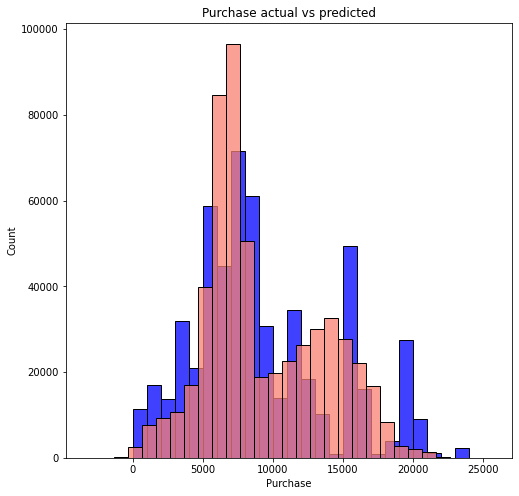

In [ ]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(8,8))

sns.histplot(data.loc[:,'Purchase'], binwidth = 1000, color = 'blue').set(title='Purchase actual vs predicted')
sns.histplot(data.loc[:,'Purchase_pred'], binwidth = 1000, color = 'salmon').set(title='Purchase actual vs predicted')
plt.show()

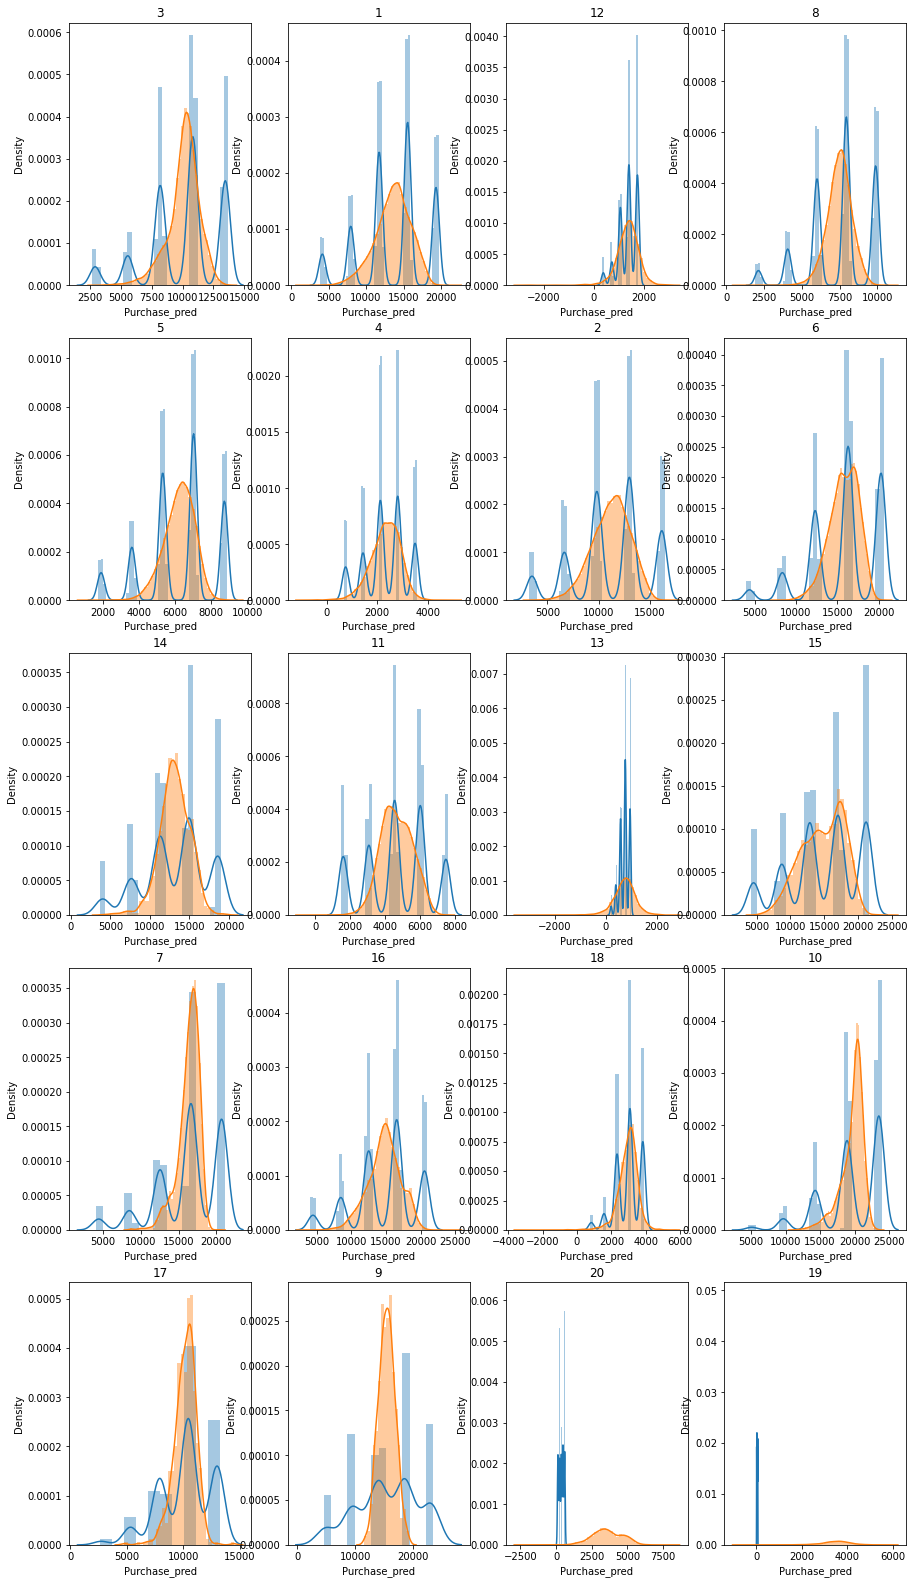

In [ ]:
brows = 5
bcols = 4
fig,axis = plt.subplots(nrows=brows,ncols=bcols,figsize=(15,28))
uv = data['Product_Category_1'].unique()
for key, value in enumerate(data['Product_Category_1'].unique()):
  # print(key, key//4, key%bcols)
  data_c1= data[(data['Product_Category_1'] == value)]
  sns.distplot(data_c1.loc[:,'Purchase'], ax=axis[key//4,key%bcols]).set(title='Product category 1 '+ str(value))
  sns.distplot(data_c1.loc[:,'Purchase_pred'], ax=axis[key//4,key%bcols]).set(title=value)
plt.show()

- Note 
 - As expected, according to the model precision that was reached (0,73), the distribution of actual vs predicted Purchase are partially overlapped. But the good thing is that the predicted distribution matches the picks of the actual distribution.

 - Similarly, same match of the picks is visible on the plots with the separated Product_Category_1 prediction, except for the subcategories with less data.

# 5.Explainer Dashboard

In [ ]:
pip install explainerdashboard

     |████████████████████████████████| 305 kB 11.1 MB/s 
     |████████████████████████████████| 57 kB 4.2 MB/s 
     |████████████████████████████████| 9.6 MB 23.9 MB/s 
     |████████████████████████████████| 197 kB 31.0 MB/s 
     |████████████████████████████████| 564 kB 49.6 MB/s 
     |████████████████████████████████| 61 kB 214 kB/s 
     |████████████████████████████████| 470 kB 39.5 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 64 kB 2.9 MB/s 
     |████████████████████████████████| 357 kB 39.6 MB/s 
     |████████████████████████████████| 136 kB 47.2 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.5-py3-none-any.whl size=67330 sha256=2741f9b1658da19099c49f097d12d00043c391e8ed84e2f2150e9511c09e3458
  Stored in directory: /root/.cache/pip/wheels/9d/84/55/4de0a214e0b9d21a96fc343b4a85547f3dab815a49682dfeb2
  Created wheel for dash-auth: filename=dash_auth-1.4.1-py3-none-any.whl size=476152 sha256=025cd1d3205946511

In [ ]:
from explainerdashboard import ExplainerDashboard, RegressionExplainer
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_expl, y_expl, test_size = 0.30, random_state=0)
xgb_expl = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.01, subsample=0.7, colsample_bytree=0.8)
xgb_expl.fit(X_train1, y_train1)

explainer = RegressionExplainer(xgb_expl, X_test1[:500], y_test1[:500])
ExplainerDashboard(explainer).run()

[17:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Changing class type to XGBRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Generating xgboost model dump...
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e

<IPython.core.display.Javascript object>

# 6.Limitation of the model

For development of the model, only data from the month before Black Friday was provided. However, it is considered that it would be more relevant if the model was trained with historical data from the previous years’ Black Fridays. Оne of the reasons for the previous is the fact that usually, buyers in the period before Black Friday refrain from buying products for which they expect promotions during Black Friday.

Additionally, the analysis showed that the correlation between the demographic features of the clients and the target variable is very low. On the other hand, their product category preferences had high correlation with the target variable. Consequently, the used data set (only from one month) had limited learning possibilities. 
